In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
papers = pd.read_csv('./data_face/data_xuli_16112023_ner_sentiment.csv')
# convert type of column
papers.rename(columns={'text': 'paper_text'}, inplace=True)
papers['paper_text'].astype(str)
# Print head
# print(papers.head())
# print(papers.shape)
# print(papers['paper_text'][0])
# print(papers['location'][0])
# print(papers['person'][0])
# print(papers['organization'][0])

0     #cfs17338\nChuyện về ktx ạ :((\nMình là người ...
1     #cfs17337\nChào các bạn, đêm khuya không ngủ đ...
2     #cfs17336\nMình là sinh viên năm cuối. Năm cuố...
3     #cfs17335\nChuyện thang máy đi từ tầng G đã kh...
4     #cfs17334\nChuyện mình muốn nói hôm nay là vấn...
5     #cfs17333\nKhông có gì nhiều đâu ạ, chỉ là mìn...
6     #cfs17333\n\nRét vcđ anh chị em ạ, mùa này thấ...
7     #cfs17332\nKhông biết mấy cô ở VP1C có điều gì...
8     <Góc những trái t❤m đi lạc>\n#cfs17330\nXin ch...
9     #cfs17329\nGóc tìm kẻ c.ắ.p!!!\nChào ad, mình ...
10      Công tác chuẩn bị 20/11 ở Malibu ngay lúc này 🥰
11    #cfs17328\nMình không hiểu tại sao có những bạ...
12    #cfs17327\nDạo này thấy cfs xôm quá lại nhớ nă...
13    #cfs17325\nBạn nam D21CN và bạn D21DT ở lớp XX...
14    #cfs17324\nChúng ta không thể làm bạn với ngườ...
15    #cfs17323\nmn cho e xin in4 chị mặc áo đồng ph...
16    #cfs17322\nXin đính chính trước là mình không ...
17    #cfs17321\nMình biết là mình dễ lừa nhưng 

In [133]:
papers.head()

,post_id,paper_text,time,timestamp,comments,shares,post_url,user_id,username,reaction_count,...,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,comments_full,commenter_name,negative,positive
0,714667314027730,#cfs17338\nChuyện về ktx ạ :((\nMình là người ...,2023-11-16 11:01:33,1700107293,23,0,https://facebook.com/PtitCfsOfficial/posts/714...,100064534036414,PTIT Confessions,79,...,1.0,3.0,2.0,2.0,0.0,0.0,"Phí Thúy 1h đêm đừng có học nữa Bạn aim bn, mì...","Nguyễn Thị Thanh Thảo, Nguyễn Tuấn Anh, Cường ...",0,1
1,714236537404141,"#cfs17337\nChào các bạn, đêm khuya không ngủ đ...",2023-11-15 20:02:08,1700053328,120,1,https://facebook.com/PtitCfsOfficial/posts/714...,100064534036414,PTIT Confessions,178,...,0.0,74.0,1.0,24.0,1.0,0.0,Minhh Hạnh ô b à Ý là bạn với ny giận nhau là ...,"Vũ Hiếu, Sky Otaku Sama, Ngọc Quỳnh, Trang, Ng...",0,1
2,713014190859709,#cfs17336\nMình là sinh viên năm cuối. Năm cuố...,2023-11-15 15:02:03,1700035323,54,0,https://facebook.com/PtitCfsOfficial/posts/713...,100064534036414,PTIT Confessions,160,...,3.0,4.0,1.0,29.0,0.0,0.0,qua team tôi cho bạn mặc sức làm từ đầu tới cu...,"Phan Huy, Nguyễn Khôi Nguyên, Hiếu Hóm Hỉnh, Đ...",1,0
3,713013604193101,#cfs17335\nChuyện thang máy đi từ tầng G đã kh...,2023-11-15 10:13:03,1700017983,312,3,https://facebook.com/PtitCfsOfficial/posts/713...,100064534036414,PTIT Confessions,358,...,1.0,46.0,4.0,169.0,1.0,1.0,Hên sáng nay k đi học =))) Thuy Luong Thi ôi x...,"Hoàn Yên, Huệ Thanh Trần, Như Thắng, Trường Gi...",1,0
4,713013097526485,#cfs17334\nChuyện mình muốn nói hôm nay là vấn...,2023-11-14 14:10:00,1699945800,16,0,https://facebook.com/PtitCfsOfficial/posts/713...,100064534036414,PTIT Confessions,100,...,10.0,0.0,0.0,10.0,0.0,0.0,Đức Nam hình như chửi a với m Dương Phạm đừng ...,"Lý Trọng Nghĩa, Hoàng Đức Khiêm, Trang Trần, H...",0,1


In [134]:
import numpy as np
# duplicated
print(papers.duplicated().sum())
papers.drop_duplicates(inplace=True)

# drop nan
papers.dropna(axis=0, inplace=True, how="any")
# drop inf
papers.replace([np.inf, -np.inf], np.nan, inplace=True)
papers.replace('', np.nan, inplace=True)
papers.dropna(inplace=True,how='any',axis=0)
# Remove the columns
try:
    papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
except:
    pass

# Print out the first rows of papers
print(papers.head())
print(papers.info())
papers.reset_index(inplace=True, drop=True)

0
           post_id                                         paper_text  \
0  714667314027730  #cfs17338\nChuyện về ktx ạ :((\nMình là người ...   
1  714236537404141  #cfs17337\nChào các bạn, đêm khuya không ngủ đ...   
2  713014190859709  #cfs17336\nMình là sinh viên năm cuối. Năm cuố...   
3  713013604193101  #cfs17335\nChuyện thang máy đi từ tầng G đã kh...   
4  713013097526485  #cfs17334\nChuyện mình muốn nói hôm nay là vấn...   

                  time   timestamp  comments  shares  \
0  2023-11-16 11:01:33  1700107293        23       0   
1  2023-11-15 20:02:08  1700053328       120       1   
2  2023-11-15 15:02:03  1700035323        54       0   
3  2023-11-15 10:13:03  1700017983       312       3   
4  2023-11-14 14:10:00  1699945800        16       0   

                                            post_url          user_id  \
0  https://facebook.com/PtitCfsOfficial/posts/714...  100064534036414   
1  https://facebook.com/PtitCfsOfficial/posts/714...  100064534036414   
2  

In [135]:
# get timestamps
timestamps = papers.time.to_list()

In [136]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# replace \n
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: re.sub('\n', ' ', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
print(papers['paper_text_processed'][0])
print(papers['paper_text_processed'][1])
print(papers['paper_text_processed'][2])

#cfs17338 chuyện về ktx ạ :(( mình là người rất hướng nội nên rất sợ khi đưa ra ý kiến hay phàn nàn gì đấy mình biết ở ktx mà cần không gian riêng tư thì rất khó nhưng mà những bạn ở ktx thì cũng nên để ý ng khác 1 tí cũng hơi khuya rồi mà nói chuyện rất to kiểu kp ai cũng học người làm này làm kia nma làm ơn nói bé lại xíu cũng được mìnhxem thêm luyện nghe toeic mà bật max tai nghe vẫn k thắng nổi tiếng của các bạn nên là please làm gì làm thì cũng nên để ý đến người khác nữa vì sống tập thể mà🥹 mình k dám nói trực tiếp chỉ viết lên đây nếu bạn nào thấy bản thân như vậy thì hãy nói bé lại vì còn những ng khác trong phòng nhé 🥰 cảm ơn vì đã đọc chúc mn 1 ngày vui vẻ ạ  -\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\- 💥 gửi cfs tại: http://bitly/ptitcfshn ptit confessions offical (since 2013) email: ptitcfshanoi@gmailcom #ptitconfessions #ptitcfs #ptitcogivui #sinhvienptit #congdongptit #ptitmaidinh
#cfs17337 chào các bạn đêm khuya không ngủ được xong mình quyết định vi

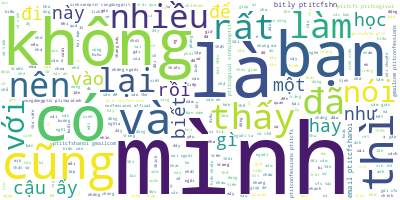

In [137]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [138]:


import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
import pyvi
import json
import underthesea
from pyvi import ViTokenizer, ViPosTagger
from underthesea import word_tokenize
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(open("./data_test/vietnamese-stopwords-dash.txt", "r", encoding="utf-8").read().splitlines())

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_number(text):
    return re.sub(r'\d+', '', text).strip()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_not_underscore(text): # remove dấu câu để lại dấu _
    # Tạo một bản sao của string.punctuation và loại bỏ dấu _
    punctuation = string.punctuation.replace("_", "")
    # punctuation = punctuation.replace("-", "")
    return text.translate(str.maketrans('', '', punctuation))

def remove_(text):
    text = remove_punctuation_not_underscore(text)
    text = remove_number(text)
    text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
    text = text.replace("_  _", "_")
    return re.sub(r'“|”', '', text).strip()
    # return ''.join(char for char in text if char not in ['“', '”'])

def remove_punctuation_underscore(text): # remove dấu _
    punctuation = "_"
    return text.translate(str.maketrans('', '', punctuation))
    
def word_to_phrase(text): # chuyển từ thành cụm từ
    # return ViTokenizer.tokenize(text)
    return word_tokenize(text, format="text")

# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         # loại bỏ dấu câu and split
#         yield([remove_(str(word)) for word in re.findall(r'\w+|\S+', word_to_phrase(str(sentence))) if remove_(str(word)) != ''])

def remove_stopwords(texts):
    words = [word for word in texts.split() if word not in stop_words]
    words_to_sentence = ' '.join(words)
    return words_to_sentence.strip()

def remove_emoj(text):
    emoj = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                                    "]+", re.UNICODE)
    return re.sub(emoj, '', text)

# drop word while # in word
def remove_word_hash(text):
    # text = re.sub(r'#.*', '', text).strip() # remove word all while # before
    return re.sub(r'#\w+', '', text).strip()
# drop url
def remove_url(text):
    text = re.sub(r'http\S+', '', text).strip()
    text = re.sub(r'www\S+', '', text).strip()
    text = re.sub(r'pic\S+', '', text).strip()
    text = re.sub(r'bit.ly\S+', '', text).strip()
    text = re.sub(r'fb\S+', '', text).strip()
    text = re.sub(r'com\S+', '', text).strip()
    text = re.sub(r'https\S+', '', text).strip()
    return text

# drop email
def remove_email(text):
    # \S kí tự không phải khoảng trắng
    # \S* kí tự không phải khoảng trắng xuất hiện 0 hoặc nhiều lần
    # \s? có thể có hoặc không có khoảng trắng cuối chuỗi
    return re.sub(r'\S*@\S*\s?', '', text).strip()

# scale word summary
def scale_word_summary(text):
    with open('./data_test/word_summary.json', 'r', encoding='utf-8') as f:
        word_summary = json.load(f)
    text = text.split()
    for i, word in enumerate(text):
        for key, value in word_summary.items():
            key = key.split('|')
            if word in key:
                text[i] = re.sub(r'\s+','_',value)
    return ' '.join(text)

# drop syntax
def pos_tagging_drop(text):
    list_dict = underthesea.pos_tag(text)
    list_word = []
    for i,val in list_dict:
        if val not in ['CH', 'L', 'M', 'R', 'E', 'C', 'I', 'T', 'X', 'Y']:
            list_word.append(i) # P, N, V, A, 'Np', 'Nc', 'Nu'
    return ' '.join(list_word)

# drop_special_character_in_word
def remove_special_character_in_word(text):
    text = re.sub(r'\w+[\+\-\/\*\%\=\:\(\)\[\]\{\}]\w+\s?', '', text).strip()
    text = re.sub(r'[\#\+\-\/\*\%\=\:\(\)\[\]\{\}]\w+\s?', '', text).strip()
    text = re.sub(r'\w+[\+\-\/\*\%\=\:\(\)\[\]\{\}]\s?', '', text).strip()
    return text

def drop_(text):
    text = re.sub(re.escape('gửi offical'), '', text).strip()
    return text
data = papers['paper_text_processed']
print('text 0: ',data[0])
print('text 1: ',data[1])
print('text 2: ',data[2])
data = data.apply(lambda x: remove_whitespace(x)) # remove whitespace (tab, \n, \r)
data = data.apply(lambda x: remove_punctuation_underscore(x))
data = data.apply(lambda x: scale_word_summary(x)) # scale word summary (mjk -> mình)
data = data.apply(lambda x: remove_word_hash(x)) # remove word hash (#) hashtag
data = data.apply(lambda x: remove_special_character_in_word(x)) # remove special character in word ("***dung" -> "")
## data = data.apply(lambda x: remove_punctuation(x)) # remove punctuation (.,!?) 
data = data.apply(lambda x: pos_tagging_drop(x)) # pos tagging drop (Ngày mai, tôi sẽ đi học -> Ngày mai, tôi đi học)
data = data.apply(lambda x: remove_emoj(x)) # remove emoj (😂)

data = data.apply(lambda x: remove_email(x)) # remove email (gmail.com)
data = data.apply(lambda x: remove_url(x)) # remove url (https://www.facebook.com)
data = data.apply(lambda x: remove_number(x)) # remove number (123)
data = data.apply(lambda x: word_to_phrase(x)) # word to phrase (tôi là ai -> tôi_là_ai)
data = data.apply(lambda x: remove_(x))
data = data.apply(lambda x: remove_stopwords(x))
data = data.apply(lambda x: remove_whitespace(x)) # remove whitespace (tab, \n, \r)
data = data.apply(lambda x: drop_(x))
print('text 0: ',data[0])
print('text 1: ',data[1])
print('text 2: ',data[2])

# print(remove_stopwords(text))
docs = data.tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhthuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/minhthuy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


text 0:  #cfs17338 chuyện về ktx ạ :(( mình là người rất hướng nội nên rất sợ khi đưa ra ý kiến hay phàn nàn gì đấy mình biết ở ktx mà cần không gian riêng tư thì rất khó nhưng mà những bạn ở ktx thì cũng nên để ý ng khác 1 tí cũng hơi khuya rồi mà nói chuyện rất to kiểu kp ai cũng học người làm này làm kia nma làm ơn nói bé lại xíu cũng được mìnhxem thêm luyện nghe toeic mà bật max tai nghe vẫn k thắng nổi tiếng của các bạn nên là please làm gì làm thì cũng nên để ý đến người khác nữa vì sống tập thể mà🥹 mình k dám nói trực tiếp chỉ viết lên đây nếu bạn nào thấy bản thân như vậy thì hãy nói bé lại vì còn những ng khác trong phòng nhé 🥰 cảm ơn vì đã đọc chúc mn 1 ngày vui vẻ ạ  -\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\- 💥 gửi cfs tại: http://bitly/ptitcfshn ptit confessions offical (since 2013) email: ptitcfshanoi@gmailcom #ptitconfessions #ptitcfs #ptitcogivui #sinhvienptit #congdongptit #ptitmaidinh
text 1:  #cfs17337 chào các bạn đêm khuya không ngủ được xong 

In [139]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.vectorizers import OnlineCountVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA
# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("keepitreal/vietnamese-sbert")
# Step 2 - Reduce dimensionality
# umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
umap_model = IncrementalPCA(n_components=5)
# Step 3 - Cluster reduced embeddings
# hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
hdbscan_model = MiniBatchKMeans(n_clusters=5, random_state=0)
# Step 4 - Tokenize topics
stop_words = list(stop_words)
vectorizer_model = OnlineCountVectorizer(stop_words=stop_words)
# vectorizer_model = CountVectorizer(stop_words=stop_words)
# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()
# Step 6 - (Optional) Fine-tune topic representations with 
# a `bertopic.representation` model
representation_model = KeyBERTInspired()

nr_topics = 5
top_n_words = 10
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
  representation_model=representation_model, # Step 6 - (Optional) Fine-tune topic represenations
  language="vietnamese", calculate_probabilities=True, verbose=True, nr_topics=nr_topics, top_n_words=top_n_words
)
topic_model = topic_model.partial_fit(docs)

Batches: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]
2023-11-21 17:02:48,010 - BERTopic - Reduced dimensionality
2023-11-21 17:02:48,022 - BERTopic - Clustered reduced embeddings


In [140]:
documents = topic_model.get_document_info(data)
documents_per_topic = documents.sort_values("Topic").groupby(['Topic'], as_index=False)
updated_topics = documents_per_topic.first().Topic.astype(int)
documents_per_topic = documents_per_topic.agg({'Document': ' '.join})
c_tf_idf,words = topic_model._c_tf_idf(documents_per_topic, partial_fit=False)
print(c_tf_idf)

# c_tf_idf = c_tf_idf.toarray()
# col=8267
# print(f'c_tf_idf of {col}: ',c_tf_idf[0][col])
# df = pd.DataFrame(c_tf_idf, columns=words,dtype='float64')
# print('------------------')
# key = 'văn_hóa'
# print(f'c_tf_idf of {key}:')
# print(df[key])
# # sort
# t = 9
# df = df[df.iloc[t].sort_values(ascending=False).index]

# print(df.iloc[t][0:10])
# print(df.iloc[t][0:10].index)
# print(topic_model.get_topic(t))
# _extract_words_per_topic

  (0, 339)	0.7217888900477218
  (0, 336)	0.8362133061358207
  (0, 199)	1.4435777800954437
  (0, 70)	0.8362133061358207
  (0, 8)	0.8362133061358207
  (1, 493)	0.012897891611349419
  (1, 492)	0.012897891611349419
  (1, 491)	0.012897891611349419
  (1, 490)	0.012897891611349419
  (1, 489)	0.012897891611349419
  (1, 485)	0.011132990591995708
  (1, 483)	0.012897891611349419
  (1, 482)	0.012897891611349419
  (1, 480)	0.012897891611349419
  (1, 479)	0.012897891611349419
  (1, 477)	0.022265981183991417
  (1, 475)	0.022265981183991417
  (1, 474)	0.05025341703889175
  (1, 473)	0.020215041813492676
  (1, 472)	0.012897891611349419
  (1, 471)	0.012897891611349419
  (1, 470)	0.012897891611349419
  (1, 469)	0.011132990591995708
  (1, 467)	0.020215041813492676
  (1, 466)	0.012897891611349419
  :	:
  (3, 122)	0.06780107887587736
  (3, 121)	0.053132778820599
  (3, 113)	0.11704684703476571
  (3, 109)	0.04933321947694242
  (3, 108)	0.06780107887587736
  (3, 94)	0.06780107887587736
  (3, 75)	0.0678010788758

In [141]:
# from bertopic.representation import BaseRepresentation
# documents = topic_model.get_document_info(data)
# documents_per_topic = documents.sort_values("Topic").groupby(['Topic'], as_index=False)
# updated_topics = documents_per_topic.first().Topic.astype(int)
# documents_per_topic = documents_per_topic.agg({'Document': ' '.join})
# c_tf_idf,words = topic_model._c_tf_idf(documents_per_topic, partial_fit=False)
# # print(c_tf_idf)

# topics = topic_model.topics_
# documents = pd.DataFrame({"Document": docs, "Topic": topics, "ID": range(len(docs)), "Image": range(len(docs))})
# # topic_representations = topic_model._extract_words_per_topic(words, documents, c_tf_idf, False)
# # topic_representations

# labels = sorted(list(documents.Topic.unique()))
# labels = [int(label) for label in labels]

# top_n_words = 9170
# indices = topic_model._top_n_idx_sparse(c_tf_idf, n=top_n_words)
# scores = topic_model._top_n_values_sparse(c_tf_idf, indices)
# sorted_indices = np.argsort(scores)
# indices = np.take_along_axis(indices, sorted_indices, axis=1)
# scores = np.take_along_axis(scores, sorted_indices, axis=1)
# topics = {label: [(words[word_index], score)
#                           if word_index is not None and score > 0
#                           else ("", 0.00001)
#                           for word_index, score in zip(indices[index][::-1], scores[index][::-1])
#                           ]
#                   for index, label in enumerate(labels)}
# # print(topics[0])
# if isinstance(topic_model.representation_model, list):
#     print(1)
#     for tuner in topic_model.representation_model:
#         topics = tuner.extract_topics(topic_model, documents, c_tf_idf, topics)
# elif isinstance(topic_model.representation_model, BaseRepresentation):
#     print(2)
#     topics = topic_model.representation_model.extract_topics(topic_model, documents, c_tf_idf, topics)
    
# elif isinstance(topic_model.representation_model, dict):
#     print(3)
#     if topic_model.representation_model.get("Main"):
#         topics = topic_model.representation_model["Main"].extract_topics(topic_model, documents, c_tf_idf, topics)

# topics = {label: values[:top_n_words] for label, values in topics.items()}
# print(topics[1])
# print(topics[5])

In [142]:
topics = topic_model.topic_representations_
print(topics[1])
print(topics[2])

[('đọc', 0.36581194), ('viết', 0.3404863), ('chăm_chỉ', 0.31765887), ('kiểu', 0.31433797), ('học', 0.3094945), ('tuần_mong', 0.28944245), ('sợ_kì', 0.28010353), ('yên_tĩnh', 0.2708855), ('this', 0.24905163), ('xong', 0.24672183)]
[('inf', 0.27665386), ('kiểu', 0.27080634), ('quan_sát', 0.24477568), ('lớp', 0.23036778), ('sai_lầm_ngudot', 0.22783442), ('aof', 0.22092304), ('chụp', 0.22028612), ('viết', 0.21999317), ('xx', 0.21597219), ('tttttt', 0.21172129)]


In [143]:

topic_model.visualize_documents(docs)

In [144]:
topic_model.visualize_topics()

Các chủ đề được tạo có thể được giảm bớt theo thứ bậc. Để hiểu cấu trúc phân cấp tiềm năng của các chủ đề, chúng ta có thể sử dụng scipy.cluster.hierarchy để tạo các cụm và trực quan hóa cách chúng liên quan với nhau. Điều này có thể giúp chọn nr_topics thích hợp khi giảm số lượng chủ đề bạn đã tạo. Để hình dung hệ thống phân cấp này, hãy chạy như sau:

In [145]:
topic_model.visualize_hierarchy()

In [146]:
topic_model.visualize_barchart()

In [147]:
topic_model.visualize_heatmap()

rank c-tf-idf của các từ theo thứ tự giảm dần

In [148]:
topic_model.visualize_term_rank() # => visualize_term_rank (rank, score)

In [149]:
classes = [i for i in papers["post_id"]]
classes = [str(i) for i in classes] # convert to string
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

0it [00:00, ?it/s]

20it [00:03,  6.52it/s]


In [150]:

count_cmt = []
positive = []
negative = []
docs_len = [len(doc.split()) for doc in docs]
papers['docs_len'] = docs_len
doc_l = []
for i in range(len(papers)):
    for j in range(len(topics_per_class)):
        if str(papers['post_id'][i]) == topics_per_class['Class'][j]:
            count_cmt.append(papers['comments'][i])
            positive.append(papers['positive'][i])
            negative.append(papers['negative'][i])
topics_per_class['Count_comments'] = count_cmt
topics_per_class['positive'] = positive
topics_per_class['negative'] = negative
print(topics_per_class.shape)
uni = topics_per_class['Name'].unique()
print(uni)
for i in range(len(topics_per_class)):
    if topics_per_class['Name'][i] == uni[3]:
        print(topics_per_class['Count_comments'][i])
# gropby class
_count_comments = topics_per_class.groupby(['Name'], as_index=False).agg({'Count_comments': 'sum'})
_count_positive = topics_per_class.groupby(['Name'], as_index=False).agg({'positive': 'sum'})
_count_negative = topics_per_class.groupby(['Name'], as_index=False).agg({'negative': 'sum'})
print(_count_comments.head())
print(_count_positive.head())
print(_count_negative.head())

(20, 8)
['2_inf_kiểu_quan_sát_lớp' '4_xinh_ngại_dám_đồng_phục_ảnh'
 '3_trapboy_thang_máy_biến_thái_mất_thiện_...' '1_đọc_viết_chăm_chỉ_kiểu'
 '0_malibu_barbershop_thế_sinh_']
16
56
13
50
16
61
10
77
                                          Name  Count_comments
0                0_malibu_barbershop_thế_sinh_             191
1                     1_đọc_viết_chăm_chỉ_kiểu             299
2                      2_inf_kiểu_quan_sát_lớp             262
3  3_trapboy_thang_máy_biến_thái_mất_thiện_...             495
4                4_xinh_ngại_dám_đồng_phục_ảnh             120
                                          Name  positive
0                0_malibu_barbershop_thế_sinh_         2
1                     1_đọc_viết_chăm_chỉ_kiểu         7
2                      2_inf_kiểu_quan_sát_lớp         5
3  3_trapboy_thang_máy_biến_thái_mất_thiện_...         2
4                4_xinh_ngại_dám_đồng_phục_ảnh         1
                                          Name  negative
0                0_malib

In [151]:
papers['docs_len'].describe()

count    20.000000
mean     38.250000
std      25.474187
min       2.000000
25%      20.500000
50%      40.000000
75%      50.250000
max      99.000000
Name: docs_len, dtype: float64

([<matplotlib.axis.XTick at 0x7f59601c12a0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140')])

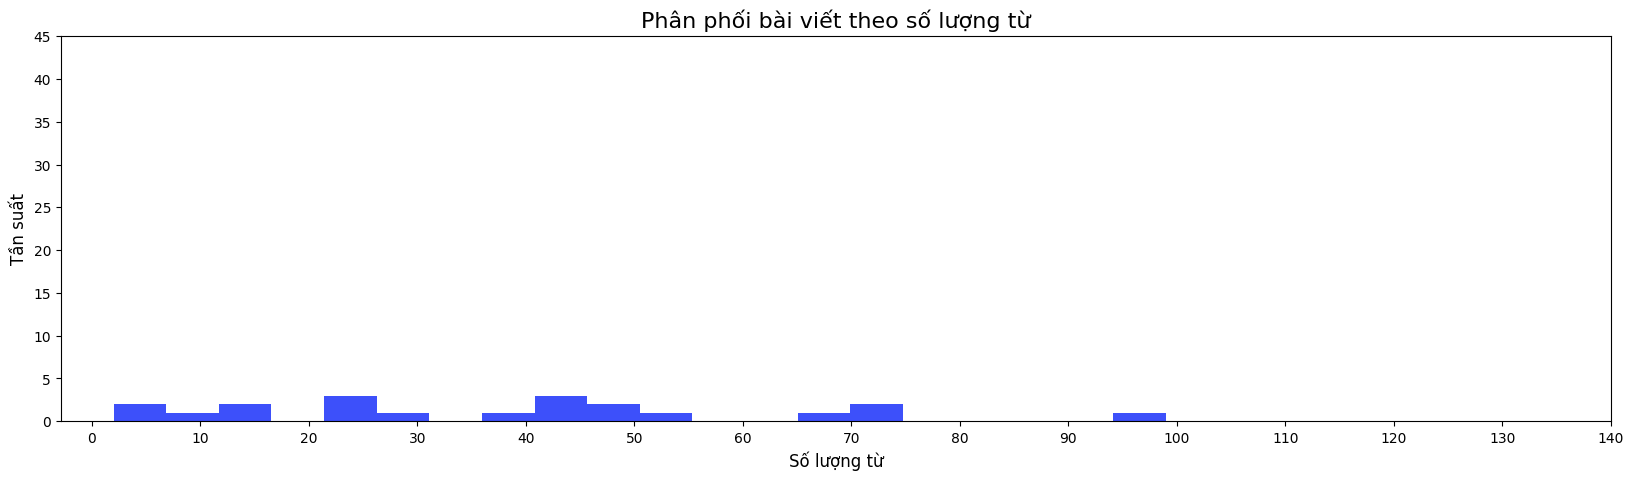

In [152]:
fig = plt.figure(figsize=(20,5))
plt.hist(
    papers['docs_len'],
    bins=20,
    color='#3D50FA'
)

plt.title('Phân phối bài viết theo số lượng từ', fontsize=16)
plt.ylabel('Tần suất', fontsize=12)
plt.xlabel('Số lượng từ', fontsize=12)
plt.yticks(np.arange(0, 50, 5))
plt.xticks(np.arange(0, 150, 10))

In [153]:
words = [word for doc in docs for word in doc.split()]
top_20_word = pd.DataFrame(Counter(words).most_common(20), columns=['word', 'frequency'])
top_20_word.head()

,word,frequency
0,học,16
1,thư_viện,13
2,nói_chuyện,7
3,kiểu,7
4,thang_máy,7


In [154]:
color_green = '#0AF712'
color_red='#FA4D43'
color_blue ='#3D50FA'
def autolabel(rects,ax):
    for rect in rects:
        height = rect.get_height() # get height of bar
        # ax.annotate -> add text for bar
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height), # x,y location of text
                    xytext=(0, 3),  # 3 points vertical offset # text location <-> height
                    textcoords="offset points",
                    ha='center', va='bottom')

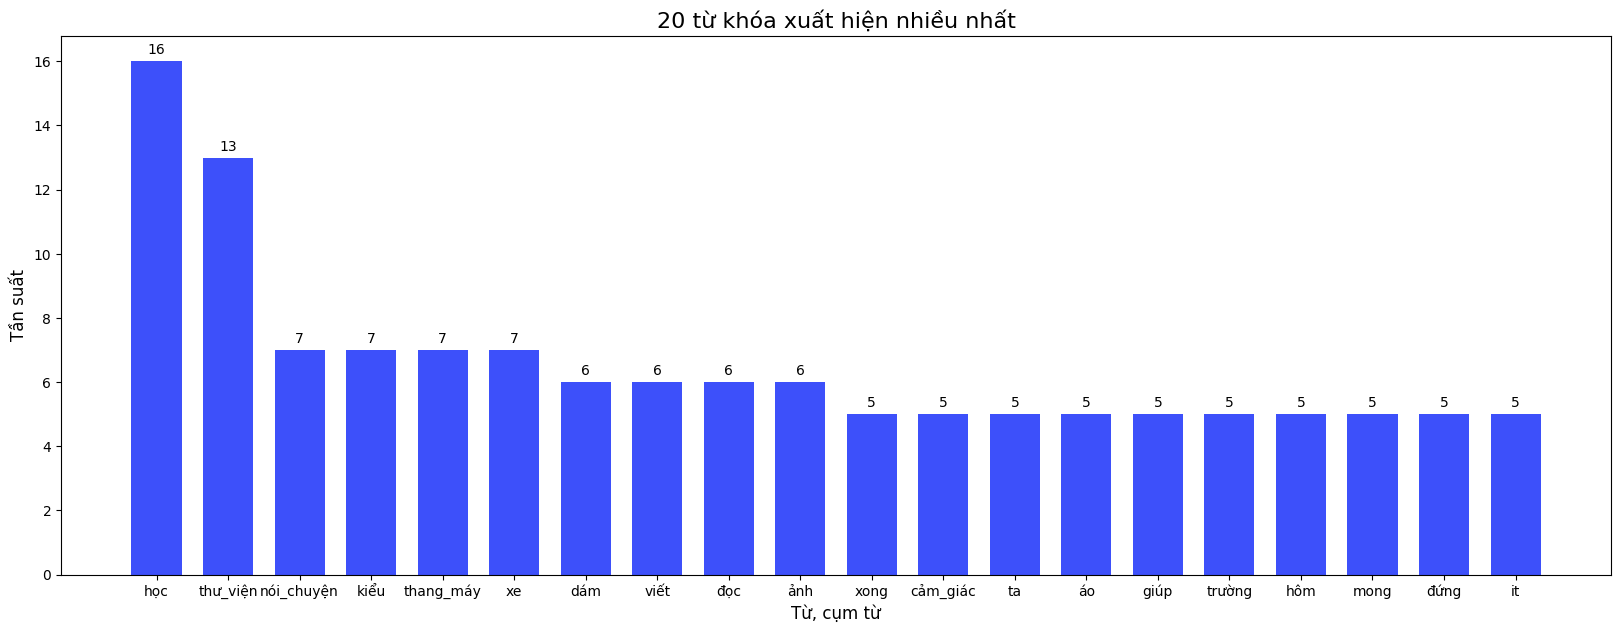

In [155]:
import seaborn as sns
width = 0.7 

fig,ax = plt.subplots(figsize=(20,7))
x = np.arange(top_20_word['word'].shape[0])
rect = ax.bar(x,top_20_word['frequency'],width, color=color_blue)

ax.set_xticks(x)
ax.set_xticklabels(top_20_word['word'])
ax.set_ylabel('Tần suất', fontsize=12)
ax.set_title('20 từ khóa xuất hiện nhiều nhất', fontsize=16)
ax.set_xlabel('Từ, cụm từ', fontsize=12)
autolabel(rect,ax)
plt.show()

In [156]:
# count_comments = _count_comments['Count_comments']
# count_positive = _count_positive['positive']
# count_negative = _count_negative['negative']
# x = np.arange(topic_model.nr_topics)
# width = 0.35/2 # the width of the bars
# # count values
count_values = topics_per_class['Name'].value_counts().sort_index()
# print(count_values)
# fig, (ax,ax1) = plt.subplots(2,figsize=(14, 7),dpi=200)
# rect_docs = ax.bar(x - width, count_values.values,width, color=color_blue,label='Số lượng bài báo')
# rect_p = ax.bar(x, count_positive.values,width, color=color_green,label='Số lượng bài báo tích cực')
# rect_n = ax.bar(x+width, count_negative.values,width, color=color_red,label='Số lượng bài báo tiêu cực')
# ax.set_xticks(x)
# ax.set_xticklabels(count_values.index)# , rotation=45
# ax.set_xlabel("Chủ đề")
# ax.set_ylabel("Số lượng")
# ax.set_title("Thống kê số lượng theo chủ đề")

# ax.legend()
# autolabel(rect_docs,ax)
# autolabel(rect_p,ax)
# autolabel(rect_n,ax)


# count_comments = _count_comments['Count_comments']
# rect_cmt = ax1.bar(x, count_comments.values,width, color='b',label='Số lượng bình luận')

# ax1.set_xticks(x)
# ax1.set_xticklabels(count_values.index)# , rotation=45
# ax1.set_xlabel("Chủ đề")
# ax1.set_ylabel("Số lượng")
# ax1.set_title("Thống kê số lượng bình luận theo chủ đề")

# ax1.legend()
# autolabel(rect_cmt,ax1)
# plt.show()

In [157]:
_count_comments

,Name,Count_comments
0,0_malibu_barbershop_thế_sinh_,191
1,1_đọc_viết_chăm_chỉ_kiểu,299
2,2_inf_kiểu_quan_sát_lớp,262
3,3_trapboy_thang_máy_biến_thái_mất_thiện_...,495
4,4_xinh_ngại_dám_đồng_phục_ảnh,120


[0 1 2 3 4]
count
positive
negative


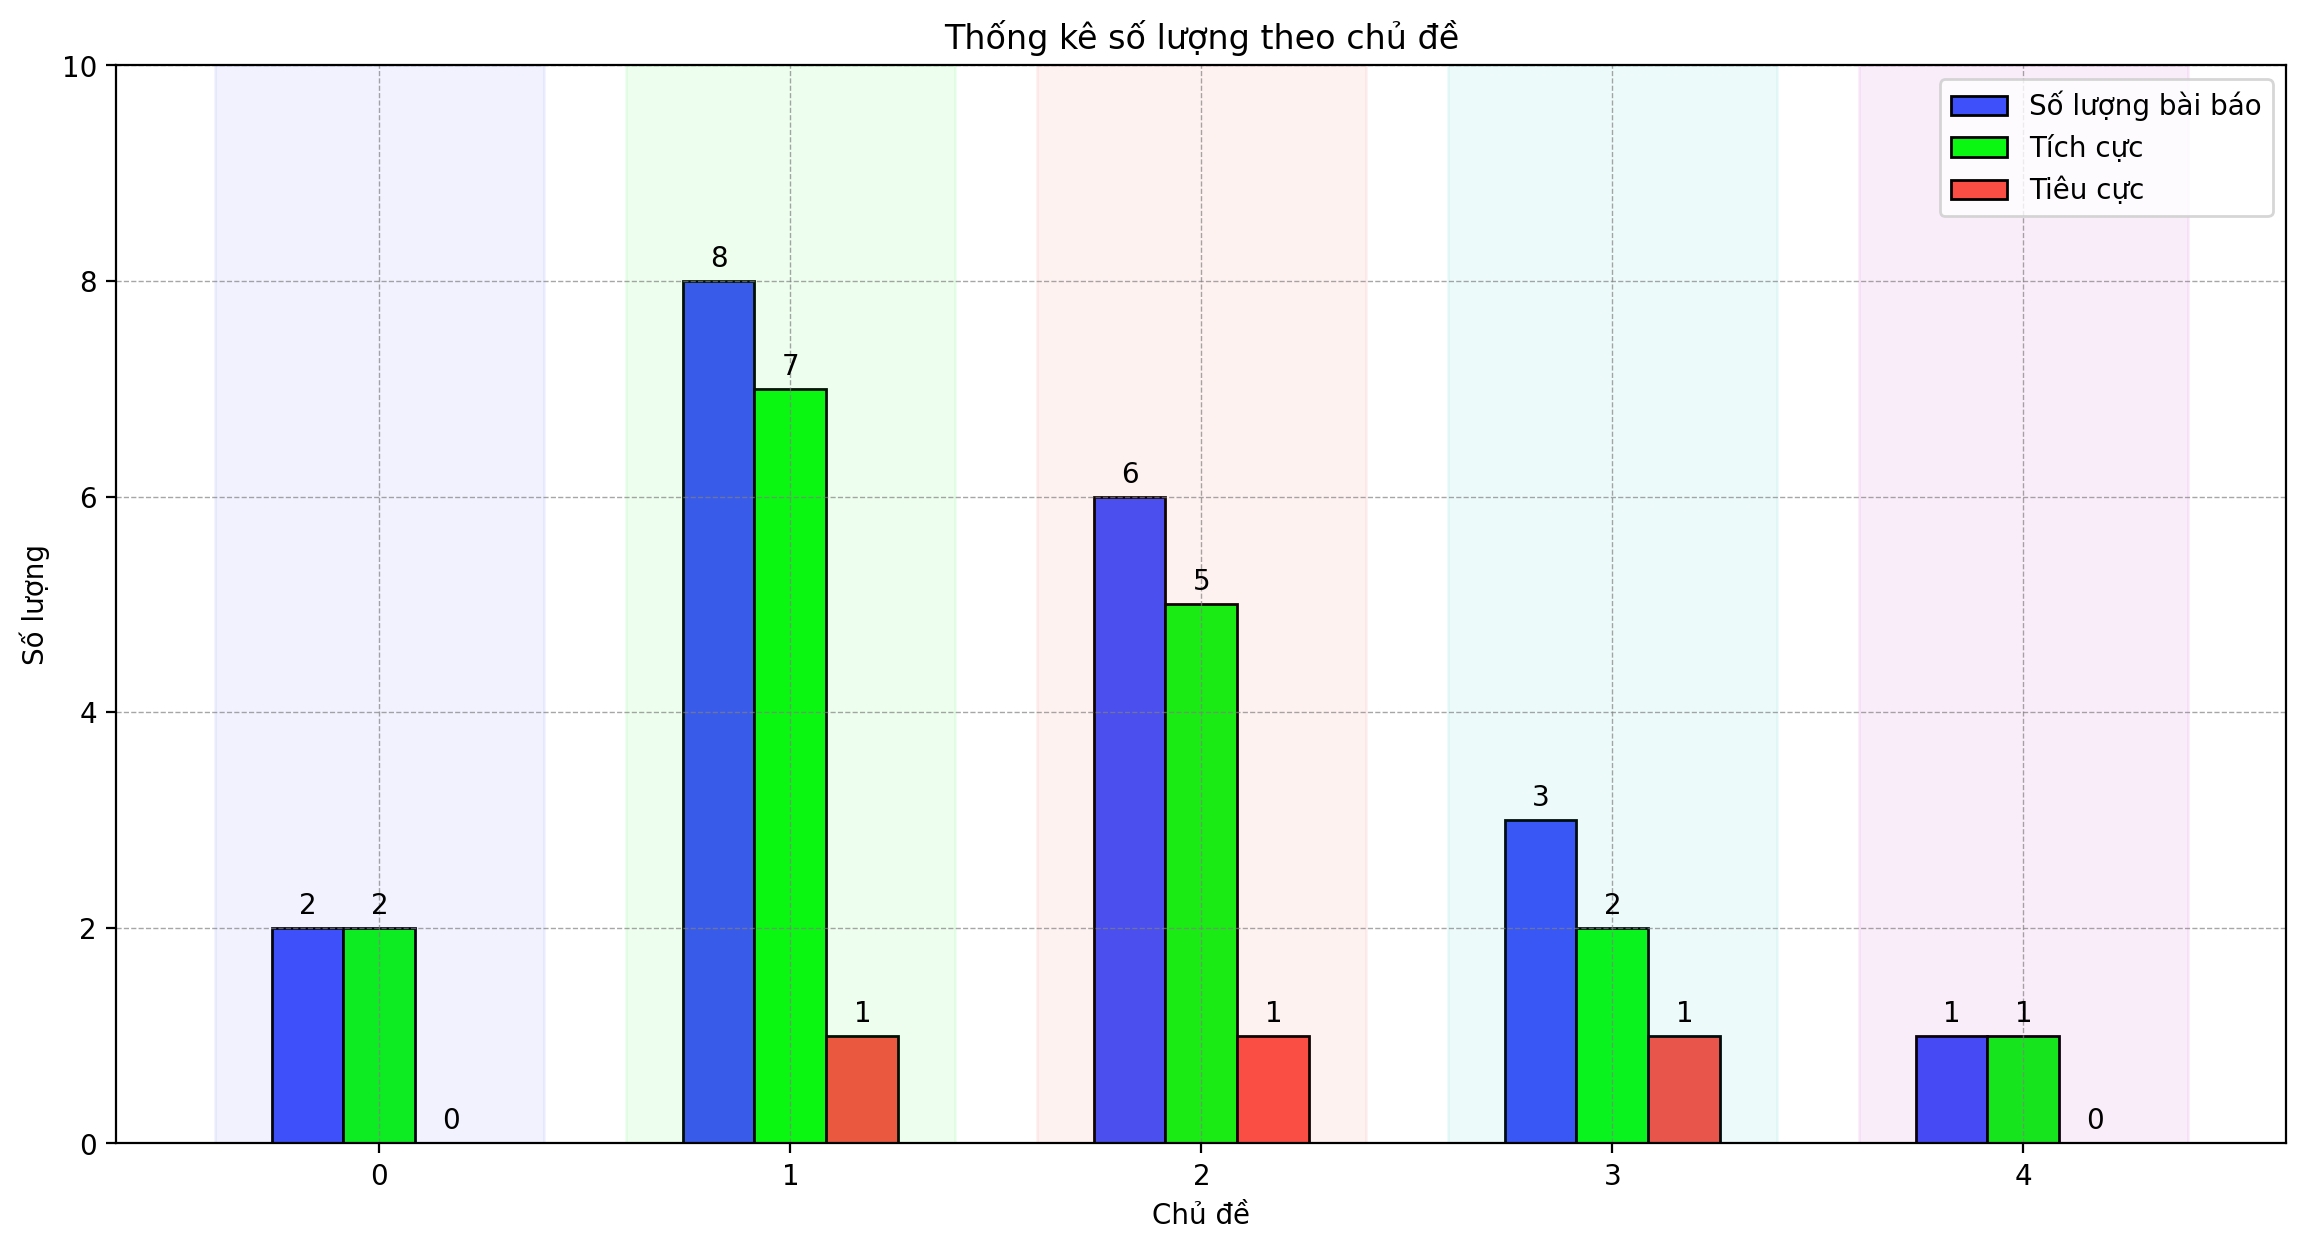

In [158]:
# merge_df = pd.merge(_count_comments, _count_positive, on='Name')
merge_df = pd.merge(count_values, _count_positive, on='Name')
merge_df = pd.merge(merge_df, _count_negative, on='Name')
merge_df.head()
def plot_(data,title,h_lim=None):
    fig, ax = plt.subplots(1,1,figsize=(14, 7),dpi=200)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    if h_lim :
        ax.set_ylim(0, h_lim)
    index = data['Name'].values
    color = [color_blue,color_green, color_red, 'c','m','y','k','w']
    x = np.arange(len(index))
    
    span_arange = np.arange(0,data.shape[0])
    print(span_arange)
    width = 0.35/2 # the width of the bars
    mode = 0
    dict_ = {'positive':'Tích cực','negative':'Tiêu cực','count':'Số lượng bài báo','Count_comments':'Số lượng bình luận'}
    for i in range(1,data.shape[1]):
        print(data.columns[i])
        rect = ax.bar(x - width + mode, data.iloc[:,i].values,width,color=color[i-1], label=dict_[data.columns[i]],edgecolor='black')
        mode = mode + 0.35/2
        autolabel(rect,ax)
        
    for i in range(len(span_arange)):
        ax.axvspan(span_arange[i]-0.4,span_arange[i] + 0.4, alpha=0.07, color=color[i])
    ax.set_xticks(x)
    # ax.set_xticklabels(index)# , rotation=45
    ax.set_xlabel("Chủ đề")
    ax.set_ylabel("Số lượng")
    ax.set_title(title)
    
    ax.legend(loc='upper right')
    plt.show()
plot_(merge_df, "Thống kê số lượng theo chủ đề",10)

[0 1 2 3 4]
Count_comments


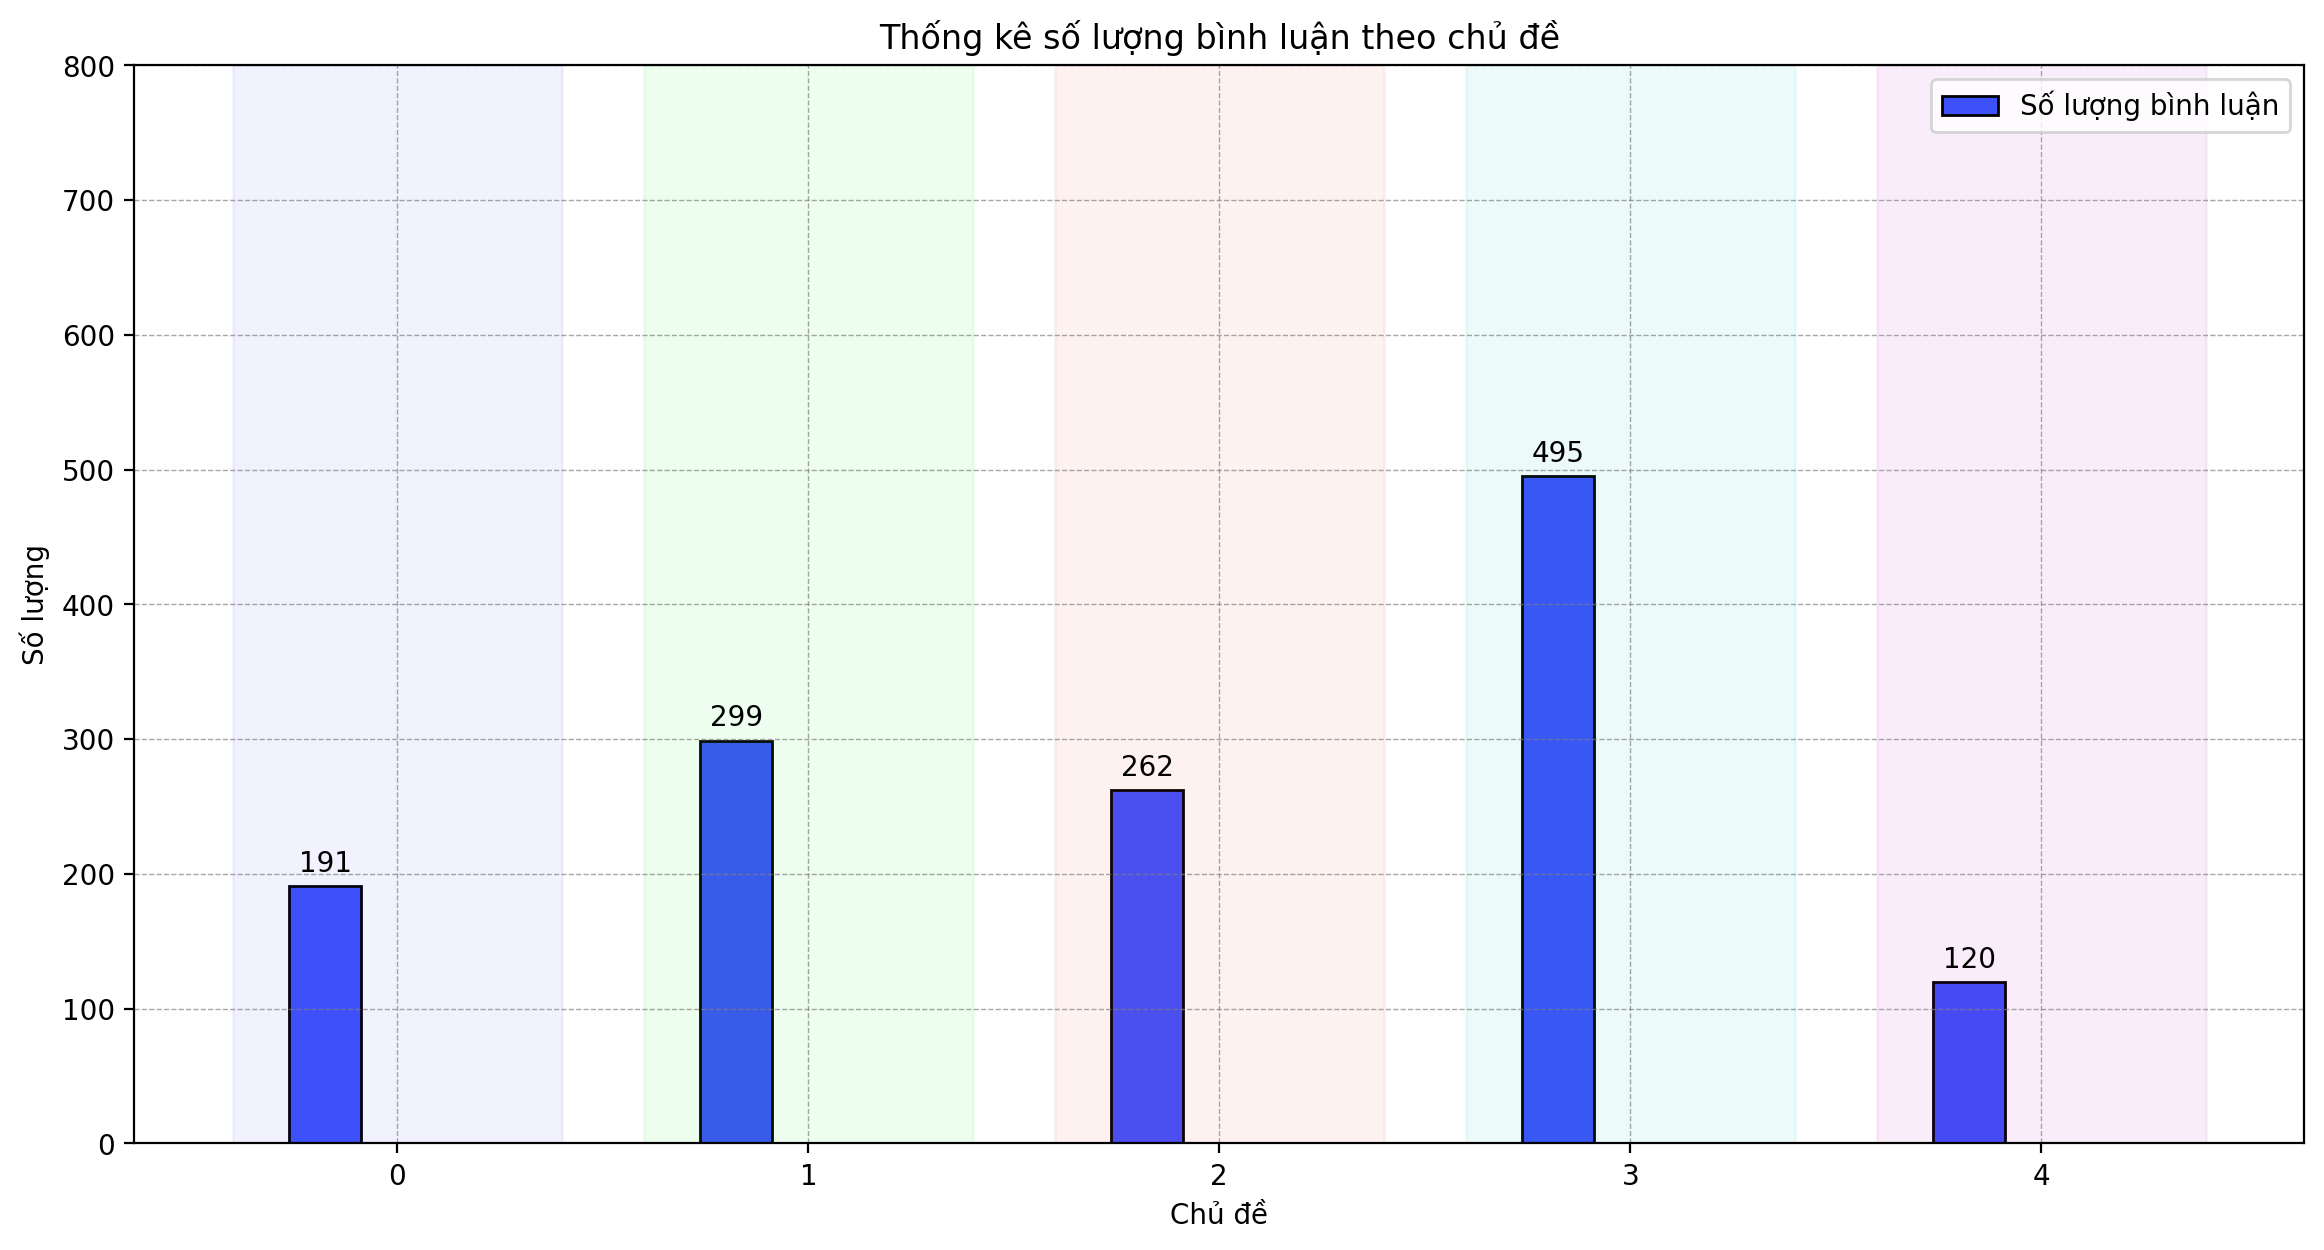

In [159]:
plot_(_count_comments, "Thống kê số lượng bình luận theo chủ đề",800)

In [160]:
print(timestamps)
import datetime
import re

timestamps1 = [time.split()[0] for time in timestamps]
print(timestamps1)
timestamp_ = [datetime.datetime.strptime(timestamp, "%Y-%m-%d").date() for timestamp in timestamps1]
print(timestamp_)
timestamp_ = [str(time.year)+'-'+str(time.month)+'-'+str(time.day) for time in timestamp_]
print(timestamp_)

['2023-11-16 11:01:33', '2023-11-15 20:02:08', '2023-11-15 15:02:03', '2023-11-15 10:13:03', '2023-11-14 14:10:00', '2023-11-14 10:05:03', '2023-11-13 22:02:08', '2023-11-13 14:06:02', '2023-11-13 10:35:00', '2023-11-13 09:41:21', '2023-11-10 19:43:14', '2023-11-10 10:25:03', '2023-11-09 13:37:02', '2023-11-09 09:38:54', '2023-11-08 10:12:01', '2023-11-07 19:39:00', '2023-11-07 15:18:05', '2023-11-05 10:42:24', '2023-11-04 20:06:00', '2023-11-03 19:24:03']
['2023-11-16', '2023-11-15', '2023-11-15', '2023-11-15', '2023-11-14', '2023-11-14', '2023-11-13', '2023-11-13', '2023-11-13', '2023-11-13', '2023-11-10', '2023-11-10', '2023-11-09', '2023-11-09', '2023-11-08', '2023-11-07', '2023-11-07', '2023-11-05', '2023-11-04', '2023-11-03']
[datetime.date(2023, 11, 16), datetime.date(2023, 11, 15), datetime.date(2023, 11, 15), datetime.date(2023, 11, 15), datetime.date(2023, 11, 14), datetime.date(2023, 11, 14), datetime.date(2023, 11, 13), datetime.date(2023, 11, 13), datetime.date(2023, 11, 1

In [161]:
topics_over_time = topic_model.topics_over_time(docs, timestamp_, datetime_format="%Y-%m-%d", nr_bins=10)

8it [00:01,  6.06it/s]


In [162]:
topic_model.visualize_topics_over_time(topics_over_time)

In [163]:
d = pd.DataFrame({"Document": docs, "Topic": topic_model.topics_, "ID": range(len(docs)),'location':papers['location'],'date':papers['time'],'person':papers['person'],'organization':papers['organization'],'timestamp':timestamp_})
d.head(10)

KeyError: 'location'

In [ ]:
print(words)
idx = np.where(words =='_mỹ_thuận')
idx

['_____________________' '__________________________'
 '_____________________________' ... 'ứng_mã' 'ứng_tuyển' 'ứng_viên']


(array([], dtype=int64),)

In [ ]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
t = 0

def get_word_in_time(data, time_start, time_end, topic):
    return data[(data['timestamp'] >= time_start) & (data['timestamp'] <= time_end) & (data['Topic'] == topic)]['Words']

def _get_word(documents,timestamps, nr_bins):
    global_c_tf_idf = normalize(topic_model.c_tf_idf_, axis=1, norm='l1', copy=False)
    all_topics = sorted(list(documents.Topic.unique()))
    all_topics_indices = {topic: index for index, topic in enumerate(all_topics)}
    print(all_topics_indices)
    
    if isinstance(timestamps[0], str):
        infer_datetime_format = True if not datetime_format else False
        documents['timestamp'] = pd.to_datetime(documents['timestamp'], 
                                                infer_datetime_format=infer_datetime_format, 
                                                format=datetime_format)
    
    if nr_bins:
        documents['Bins'] = pd.cut(documents.timestamp, bins=nr_bins)
        documents['timestamp'] = documents.apply(lambda row:row.Bins.left, 1)
        

def getdoc(topic):
    doc = d[d['Topic']==topic]
    return doc

def get_doc_with_timestamp(data,time_start,time_end):
    return data[(data['Timestamp'] >= time_start) & (data['Timestamp'] <= time_end)]

def list_arr_to_arr(arr):
    return [item for sublist in arr for item in sublist]

def unique_count(arr):
    # drop duplicate
    arr = [np.unique(x) for x in arr]
    # list arr to arr
    arr = list_arr_to_arr(arr)
    # count element
    unique, counts = np.unique(arr, return_counts=True)
    df = pd.DataFrame({'unique':unique,'counts':counts})
    df.sort_values(by=['counts'],ascending=False,inplace=True)
    return df

def plot_bar(data,title,word,topic):
    t = len(data)
    fig, ax = plt.subplots(1,t,figsize=(20,5))
    fig.suptitle(f'word: {word}, topic: {topic}')
    for i in range(t):
        sns.barplot(x='unique',y='counts',data=data[i],ax=ax[i])
        ax[i].set_title(title[i])

def find_word_in_doc(word,topic):
    doc_ = getdoc(topic)
    print('sum doc: ',len(doc_))
    doc_word = doc_[doc_['Document'].str.contains(word)]
    print(f'sum doc constains {word}: ',len(doc_word))
    
    arr_location = doc_word['location'].apply(lambda x: ast.literal_eval(x)).to_list()
    df_location = unique_count(arr_location)
    df_location = df_location[0:3]
    # print('--------location--------')
    # print(df_location)
    
    arr_person = doc_word['person'].apply(lambda x: ast.literal_eval(x)).to_list()
    df_person = unique_count(arr_person)
    df_person = df_person[0:3]
    # print('--------person--------')
    # print(df_person)
    
    arr_organization = doc_word['organization'].apply(lambda x: ast.literal_eval(x)).to_list()
    df_organization = unique_count(arr_organization)
    df_organization = df_organization[0:3]
    # print('--------organization--------')
    # print(df_organization)
    # plot
    title = ['location','person','organization']
    data = [df_location,df_person,df_organization]
    plot_bar(data,title,word,topic)
    return doc_word


for i in range(topic_model.nr_topics):
    print('topic: ',i)
    x = topics[i][0:3]
    for word, score in x:
        print(word, score)
        print(len(find_word_in_doc(word,i)))
        print('------------------')

# _get_word(d,timestamp_,10)

In [ ]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)
print('topic_distr: ',len(topic_distr[0])) # n: số lượng chủ đề
print('len of topic_distr: ',len(topic_distr)) # m: số lượng tài liệu hay bài báo
df = topic_model.visualize_approximate_distribution(docs[1], topic_token_distr[1])
df

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

topic_distr:  5
len of topic_distr:  968


,kiếm,mập_mờ,malibu,gấp,lạnh,rồiiiiiii
3_malibu_nhập_học_mời_sự_kiện,0.179,0.350,0.521,0.521,0.341,0.171


In [ ]:
print(topics_over_time.shape)
data_topic_over_time = topics_over_time
time_start = "2023-07-28"
time_end = "2023-08-16"
def get_doc_with_timestamp(data,time_start,time_end):
    return data[(data['Timestamp'] >= time_start) & (data['Timestamp'] <= time_end)]
data_topic_over_time = get_doc_with_timestamp(data_topic_over_time,time_start,time_end)
data_topic_over_time.head(20)

(49, 5)


,Topic,Words,Frequency,Timestamp,Name
29,0,"tiếng_anh, chứng_chỉ, tiếng_anh_liệu, học_trườ...",17,2023-07-29 04:48:00,0_tiếng_anh_đầu_vào_đào_tạo_tốt_nghiệp
30,1,"ký_túc_xá, tủ_lạnh, tủ, thang_máy, không_gian",27,2023-07-29 04:48:00,1_hà_đông_hà_nội_tùy_học_viện
31,2,"tuyển_sinh, đào_tạo, an_toàn_thông_tin_trường,...",13,2023-07-29 04:48:00,2_tuyển_sinh_đào_tạo_xét_tuyển_đại_học
32,3,"đăng_kí_nguyện_vọng, trường_minh, nhập_học, đó...",14,2023-07-29 04:48:00,3_malibu_nhập_học_mời_sự_kiện
33,4,"avatar, quét_mã, chính_thức, ptiter, công_bố",30,2023-07-29 04:48:00,4_thông_báo_văn_hóa_lập_trình_học_viện_c...
